In [162]:
import pandas as pd
import matplotlib.pyplot as plt

##### 样本的标签值和预测概率

In [163]:
data = {'label':[0,   0,   0,   0,   0,   0,   0,   0,   0,   1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
        'proba':[0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.5, 0.7, 0.9, 0.15, 0.45, 0.55, 0.75, 0.75, 0.85, 0.95, 0.75, 0.85, 0.95]}
df = pd.DataFrame(data)
len(df)

19

##### 画出概率分布图

Text(0.5, 1.0, '预测概率分布')

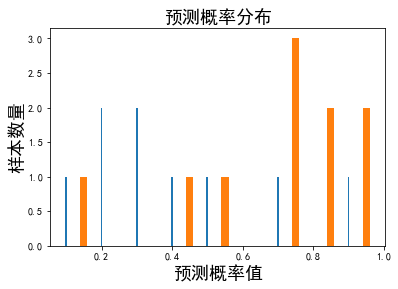

In [176]:
group = df.groupby(['label', 'proba']) # 按标签值和概率值分组
la0 = group.size()[0] # 负类样本概率值统计数
la1 = group.size()[1] # 正类样本概率值统计数

x0 = [] # 负类样本概率值
y0 = [] # 负类样本概率值对应的样本数量
for index, val in la0.items():
    x0.append(index)
    y0.append(val)

x1 = []
y1 = []
for index, val in la1.items():
    x1.append(index)
    y1.append(val)
    
plt.rcParams['font.sans-serif']=['SimHei'] # 设置字体为黑体
plt.rcParams['axes.unicode_minus']=False 
p1 = plt.bar(x0, height=y0, width=0.005) # 细线表示负类样本分布
p2 = plt.bar(x1, height=y1, width=0.02) # 组线表示正类样本分布
plt.xlabel('预测概率值', size=18)
plt.ylabel('样本数量', size=18)
plt.title('预测概率分布', size=18)

##### 计算FPR和TPR对，并画出ROC曲线

Text(0.5, 1.0, 'ROC Curve')

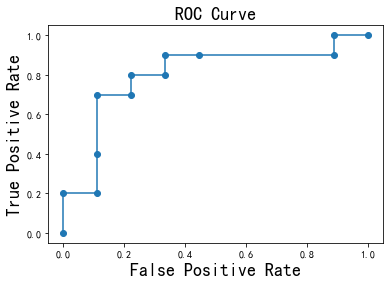

In [179]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df['label'].values, df['proba'].values, pos_label=1)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('False Positive Rate', size=18)
plt.ylabel('True Positive Rate', size=18)
plt.title('ROC Curve', size=18)

In [165]:
print("auc = " + str(metrics.auc(fpr, tpr))) # metrics.auc函数是以梯形法则求出ROC曲线与横坐标所夹面积

auc = 0.8


##### 验算FPR和TPR值

In [155]:
df.sort_values('proba', inplace=True, ascending=False)
df

,label,proba
18,1,0.95
15,1,0.95
8,0,0.90
17,1,0.85
14,1,0.85
12,1,0.75
13,1,0.75
16,1,0.75
7,0,0.70
11,1,0.55


In [156]:
# 取阈值0.95，从上表中可知TP为2，FP为0
fp = 0
tp = 2
fpr = fp / la0.sum()
tpr = tp / la1.sum()
print('fpr = '+str(fpr)+', tpr = '+str(tpr))

fpr = 0.0, tpr = 0.2


In [157]:
# 取阈值0.9，从上表中可知TP为2，FP为1
fp = 1
tp = 2
fpr = fp / la0.sum()
tpr = tp / la1.sum()
print('fpr = '+str(fpr)+', tpr = '+str(tpr))

fpr = 0.1111111111111111, tpr = 0.2


In [158]:
# 取阈值0.85，从上表中可知TP为4，FP为1
fp = 1
tp = 4
fpr = fp / la0.sum()
tpr = tp / la1.sum()
print('fpr = '+str(fpr)+', tpr = '+str(tpr))

fpr = 0.1111111111111111, tpr = 0.4


In [159]:
# 取阈值0.75，从上表中可知TP为7，FP为1
fp = 1
tp = 7
fpr = fp / la0.sum()
tpr = tp / la1.sum()
print('fpr = '+str(fpr)+', tpr = '+str(tpr))

fpr = 0.1111111111111111, tpr = 0.7


In [160]:
# 取阈值0.7，从上表中可知TP为7，FP为2
fp = 2
tp = 7
fpr = fp / la0.sum()
tpr = tp / la1.sum()
print('fpr = '+str(fpr)+', tpr = '+str(tpr))

fpr = 0.2222222222222222, tpr = 0.7
